In [1]:
#Classifying Fashion-MNIST data
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


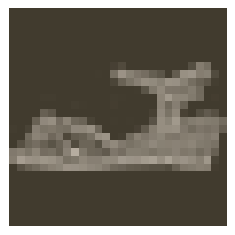

In [5]:
image,label=next(iter(trainloader))
helper.imshow(image[0,:]);

In [8]:
#Archtecture
from torch import nn
import torch.nn.functional as F
from torch import optim
model = nn.Sequential(nn.Linear(784, 128),nn.ReLU(),nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 10),nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
epochs = 10
for i in range(0,epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],784)
        
        
        #Forward pass
        logps = model.forward(images)
        #calculate loss
        loss = criterion(logps, labels)
        #gradients
        optimizer.zero_grad()
        loss.backward()
        #updating
        optimizer.step()
        
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.4588747018817137
Training loss: 0.4361779942060076
Training loss: 0.417798828452762
Training loss: 0.40319908596178106
Training loss: 0.391730211341559
Training loss: 0.3807210154466029
Training loss: 0.3712274152428102
Training loss: 0.361699339502783
Training loss: 0.3537489551899911
Training loss: 0.34640839775360976


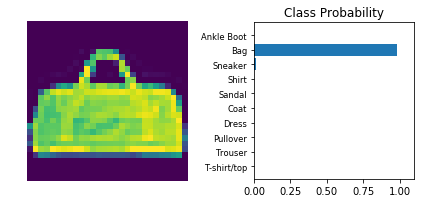

In [13]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

ps = F.softmax(logps,dim=1)
helper.view_classify(img.view(1, 28, 28), ps,version='Fashion')